In [1]:
%matplotlib widget

import torch
import numpy as np
import meshplot as mp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import torch_mpfd_solver as torchsolver


In [14]:
import random

dt = 120.
zN = 40.
tN = random.randint(300,1200)


psiB = random.uniform(-150,-50)
psiT = random.uniform(-50,-10)

# Test problem for plotting errors
#tN = 360
#psiB = -61.5
#psiT = -20.7


psiInitial = sorted([random.uniform(psiB,psiB) for _ in range(int(zN-1))])
psiInitial = np.hstack([psiB,psiInitial,psiT])

z,t,dts,dz,n,nt,zN,psi,psiB,psiT,pars = torchsolver.setup(dt,tN,zN,psiInitial,torchsolver.havercampSetpars)

output = torchsolver.fullModelRun(dt,dts,dz,n,nt,psi,psiB,psiT,pars, torchsolver.havercampCfun,torchsolver.havercampKfun,torchsolver.havercampthetafun,0)



z=np.hstack([0,z,zN])
z=z[-1]-z

torchsolver.massBalance(output,torchsolver.havercampKfun,torchsolver.havercampthetafun,dz,dts,pars)

tensor([1.0000], grad_fn=<DivBackward0>)

In [19]:

print(output[0])
print(output[1])


#grads = torch.autograd.grad(outputs = output[1],inputs = output[0],grad_outputs=torch.ones_like(output[0]),allow_unused=True)

#print(grads)

tensor([-56.9824, -56.9824, -56.9824, -56.9824, -56.9824, -56.9824, -56.9824,
        -56.9824, -56.9824, -56.9824, -56.9824, -56.9824, -56.9824, -56.9824,
        -56.9824, -56.9824, -56.9824, -56.9824, -56.9824, -56.9824, -56.9824,
        -56.9824, -56.9824, -56.9824, -56.9824, -56.9824, -56.9824, -56.9824,
        -56.9824, -56.9824, -56.9824, -56.9824, -56.9824, -56.9824, -56.9824,
        -56.9824, -56.9824, -56.9824, -56.9824, -56.9824, -33.1592],
       grad_fn=<CatBackward0>)
tensor([-56.9824, -56.9824, -56.9824, -56.9824, -56.9824, -56.9824, -56.9824,
        -56.9824, -56.9824, -56.9824, -56.9824, -56.9824, -56.9823, -56.9823,
        -56.9821, -56.9820, -56.9816, -56.9811, -56.9802, -56.9788, -56.9764,
        -56.9725, -56.9659, -56.9552, -56.9374, -56.9080, -56.8596, -56.7801,
        -56.6498, -56.4377, -56.0958, -55.5531, -54.7123, -53.4557, -51.6707,
        -49.2981, -46.3830, -43.0878, -39.6452, -36.2816, -33.1592],
       grad_fn=<CatBackward0>)


360

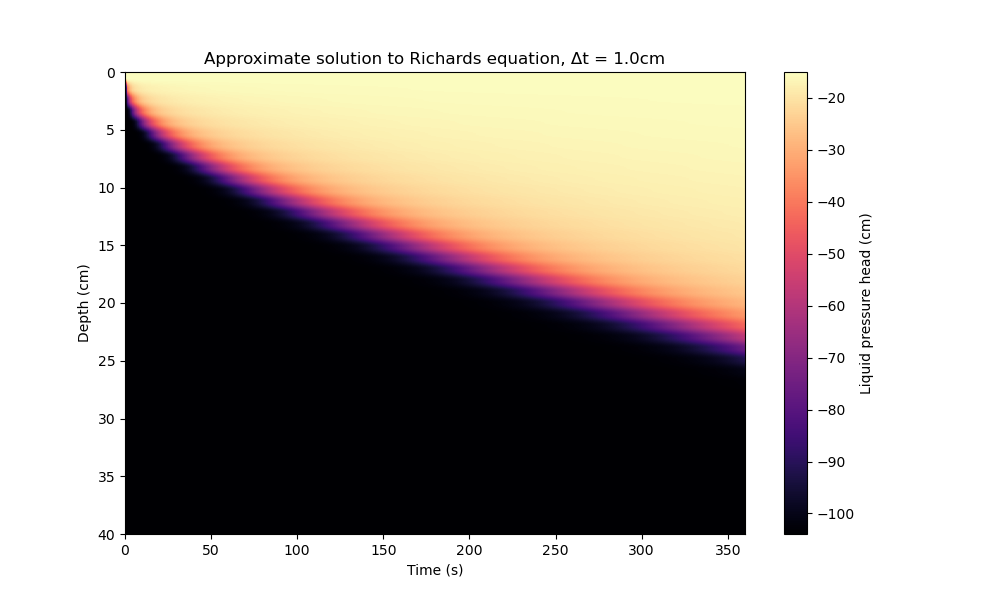

In [4]:
plt.figure(figsize=(10, 6))

# Adjust the extent of the plot using the timepoints
plt.imshow(np.stack(output,axis=0).T, aspect='auto', cmap='magma', extent=[t[0], t[-1], z[0],z[-1]],origin = 'lower')
plt.colorbar(label='Liquid pressure head (cm)')
plt.xlabel('Time (s)')
plt.ylabel('Depth (cm)')
plt.title(f'Approximate solution to Richards equation, Δt = {dz[0]}cm')



tN

Text(0, 0.5, 'Pressure head (cm)')

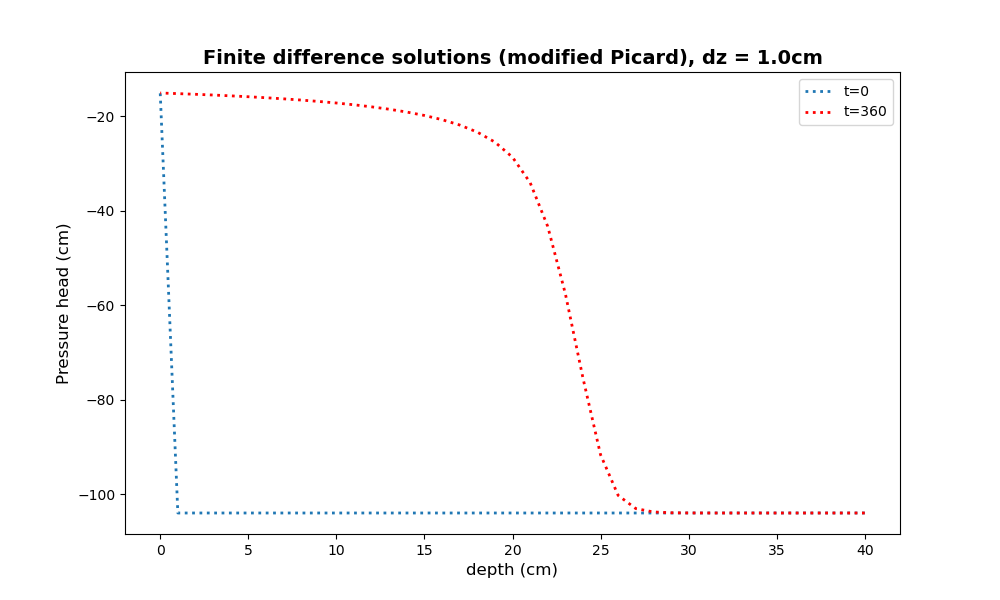

In [5]:

    


fig,ax2 = plt.subplots(figsize=(10, 6))
#ax2.plot(z, output[0],linestyle=':',linewidth=2.0,label = "t=0")
ax2.plot(z, output[-1],linestyle=':',linewidth=2.0,color='red',label=f"t={tN}")

ax2.legend(title='')
ax2.set_title("Finite difference solutions (modified Picard), dz = 1.0cm", fontsize=14, fontweight='bold')
ax2.set_xlabel("depth (cm)", fontsize=12)
ax2.set_ylabel("Pressure head (cm)", fontsize=12)




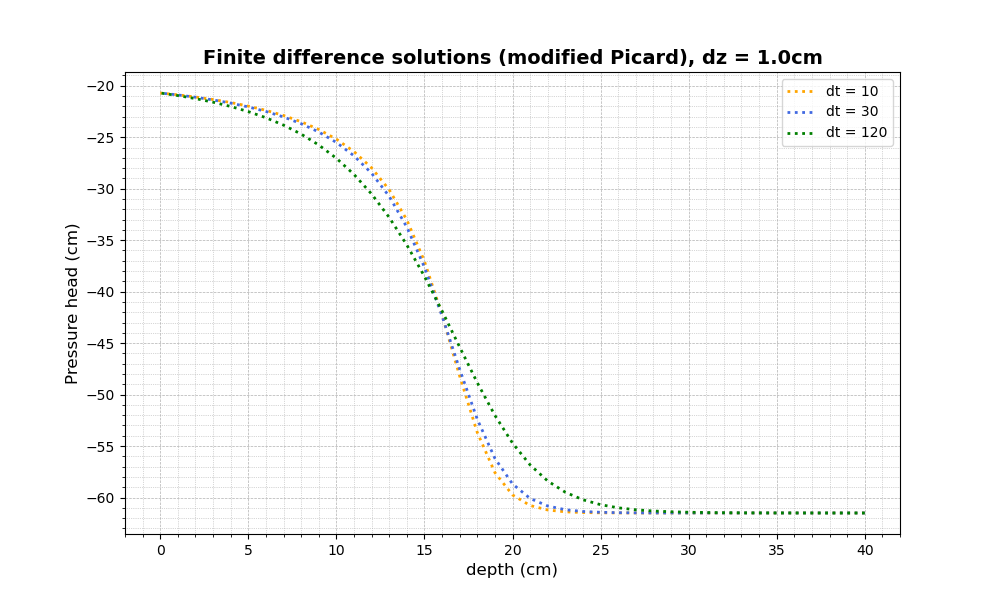

In [2]:
### Plotting test ###

# coarser grid, different timescales.

dts = [10,30,120]
zN = 40.
tN = 360.
psiB = -61.5
psiT = -20.7

psiInitial = np.hstack([psiB,np.full(39,-61.5),psiT])




fig,ax1 = plt.subplots(figsize=(10, 6))
colors = ['orange','royalblue','green']

for i in range(len(dts)):
    z,t,dtlast,dz,n,nt,zN,psi,psiB,psiT,pars=torchsolver.setup(dts[i],tN,zN,psiInitial)
    psi = torchsolver.ModelRun(dts[i],dtlast,dz,n,nt,psi,psiB,psiT,pars)
    #psifinal=np.hstack([psiB,psi[-1].detach().numpy(),psiT])
    psifinal=np.hstack([psiB,psi[-1].detach().numpy(),psiT])
    z=np.hstack([0,z,zN])
    z=z[-1]-z
    ax1.plot(z, psifinal,label= f"dt = {dts[i]}",color=colors[i],linestyle=':',linewidth=2.0)


ax1.legend(title='')
ax1.set_title("Finite difference solutions (modified Picard), dz = 1.0cm", fontsize=14, fontweight='bold')
ax1.grid(True)
ax1.set_xlabel("depth (cm)", fontsize=12)
ax1.set_ylabel("Pressure head (cm)", fontsize=12)


ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.minorticks_on()
ax1.grid(True, which='minor', linestyle=':', linewidth=0.5)


# dense grid
'''
dt = 1
zN = 40.
tN = 360.

psiInitial = np.hstack([psiB,np.full(399,-61.5),psiT])


z,t,dtlast,dz,n,nt,zN,psi,psiB,psiT,pars=torchsolver.setup(dt,tN,zN,psiInitial)
psi,err = torchsolver.ModelRun(dt,dtlast,dz,n,nt,psi,psiB,psiT,pars)

z=np.hstack([0,z,zN])
z=z[-1]-z

#psifinal=np.hstack([psiB,psi[-1].detach().numpy(),psiT])
psifinal=np.hstack([psiB,psi[-1].detach().numpy(),psiT])


ax1.plot(z, psifinal,label=f"dense grid",color="black",linewidth=1.0)
ax1.legend()
'''

plt.show()

